DSCI 100 Individual Planning Stage

In [21]:
library(tidyverse) #Install this library first!

Players: Data Description

Players dataset:
- This dataset describes the attributes of individual players. There are 7 total variables:
| Variable       | Type      | Description                                                                                                                | Potential Issues / Notes  |
|----------------|-----------|----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| **Experience** | Character | Categorizes expertise based on player input        | Need to be converted to dummy variable for regression  |
| **Subscribe**  | Logical   | Indicates whether the player subscribed to the game-related newsletter   | N/A |
| **Hashed Email** | Character | Encrypted version of the player’s email address.                             | Not useful for analysis                   |
| **Player Hours** | Double  | Number of hours the player spent in a session, as tracked by the server logs.         | Sessions shorter than 6 minutes are undercounted as 0.0     |
| **Name**       | Character | Player’s self-reported name.                                                                                               | may contain duplicates                      |
| **Gender**     | Character | Self-reported gender               | N/A                        |
| **Age**        | Double    | Self-reported player age (in years).                                                                                       |   N/A    |



There are 196 total observations in this dataset. The average playtime is 5.85 hours, with a median of 0.1, and the average player age is 21.13 years old, with a median of 19.


Sessions: Data Description 

- This dataset is fully documented by server logs and tracks the start time and end time of each play session of all registered players. There are 5 total variables with 1535 observations.

| Variable              | Type       | Description                                                                                                                   | Potential Issues / Notes                                                                 |
|------------------------|------------|-------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| **Hashed Email**       | Character  | Encrypted player email used as a unique identifier   | Serves only as an identifier|
| **Start Time**         | Datetime   | The date and time when the player began a play session.                                            | Time format may require conversion for analysis.              |
| **End Time**           | Datetime   | The date and time when the player ended a play session.                                            | N/A             |
| **Original Start Time**| Numeric    | Unix timestamp (milliseconds since Jan 1, 1970) | Requires conversion to standard datetime|
| **Original End Time**  | Numeric    | Unix timestamp (milliseconds since Jan 1, 1970)                          | Requires conversion to standard datetime                         |


  
              
   

Broad Question 2:

I will explore if age and experience can predict the number of playing hours. To do this, I will  use data from the players.csv file. I will run a multivariate regression analysis. I will need to wrangle Experience into a dummy variable for regression. 

This question will help address the broad question by determining if a specific age/expertise group will be most likely to contribute a large amount of data, allowing the researchers to strategically market their product.



Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


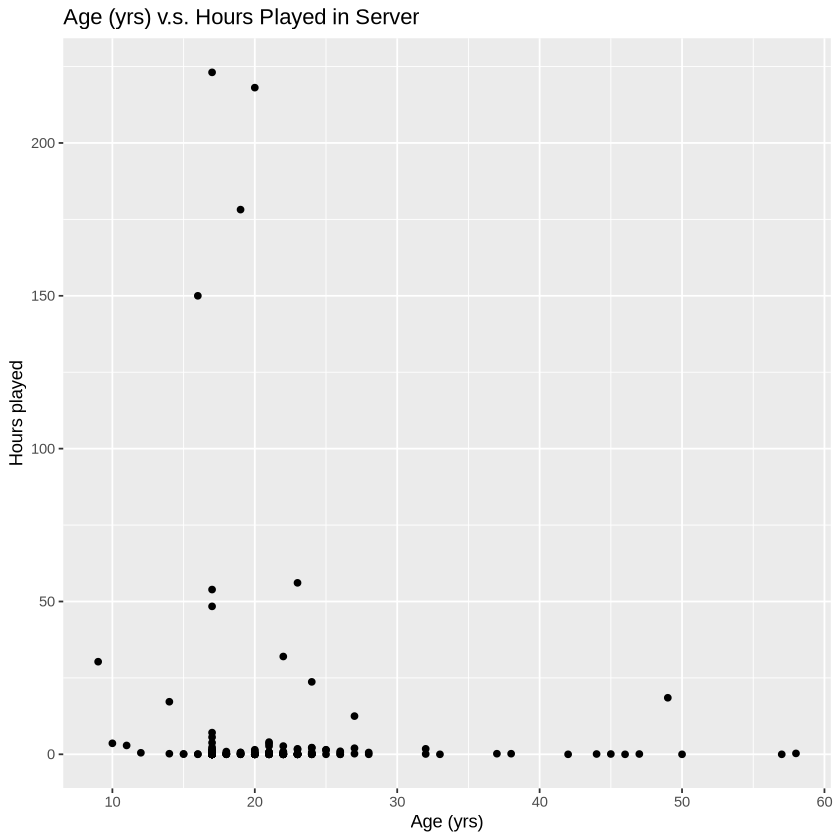

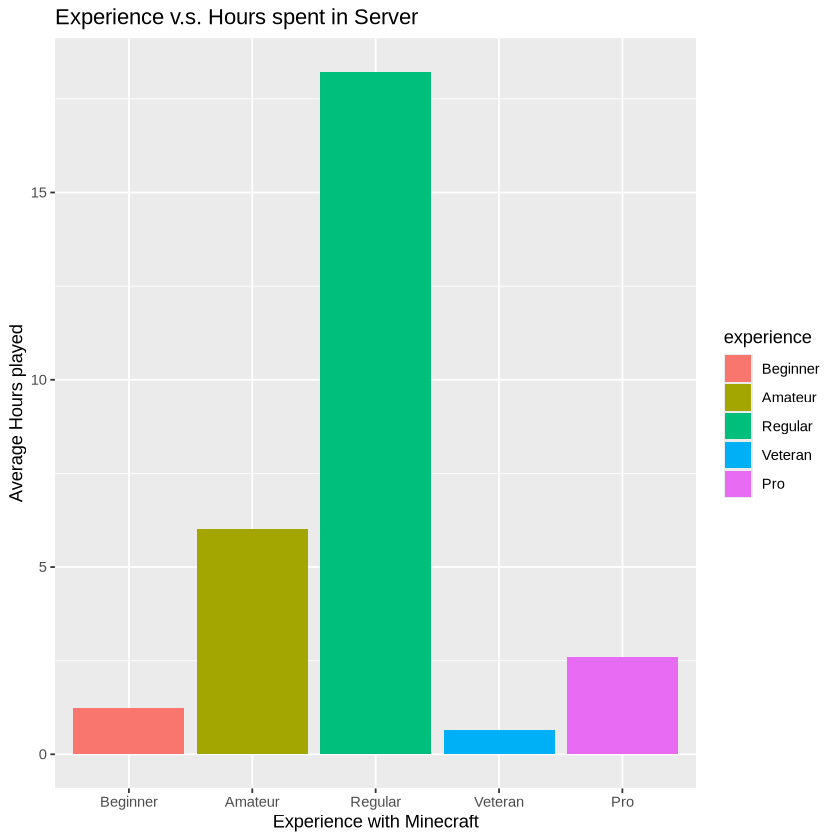

In [23]:
#Code only, Response Answers are below. 

player_data <- read_csv("data/players.csv")


mean_hours <- player_data |> summarize(Average_Hours_Played = mean(played_hours))
mean_age <- player_data |> summarize(Average_Age = mean(Age, na.rm = TRUE))
median_hours <- player_data |> summarize(Median_Hours_Played = median(played_hours, na.rm = TRUE))
median_age <- player_data |> summarize(Media_Age = median(Age, na.rm = TRUE))

session_data <- read_csv("data/sessions.csv")
age_hour_graph <- player_data |> ggplot(aes(x = Age, y = played_hours)) + geom_point() + labs(x = "Age (yrs)", y = "Hours played", title = "Age (yrs) v.s. Hours Played in Server")
age_hour_graph

player_data_new <- player_data |> group_by(experience) |> summarize(average = mean(played_hours)) |> mutate(experience = factor(experience, 
                             levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro")))

experience_hour_graph <- player_data_new |> ggplot(aes(x = experience, y = average, fill = experience)) + geom_bar(stat = "identity") + labs(title = "Experience v.s. Hours spent in Server", x = "Experience with Minecraft", y = "Average Hours played")
experience_hour_graph

Players. csv File Mean value data (rounded to 2 decimal places). This dataset is tidy for my purposes.
| Variable        | Mean Value |
|-----------------|-------------|
| Age (years)     | 21.14       |
| Played Hours    | 5.85        |


We have to consider Linear and KNN regression. We have to observe if the relationship between Age (yrs), Experience, and Hours played have a strong lnear relationship. Thus, I plotted each of the two predictor variables against Hours Played. 

Both graphs demonstrate a highly non-linear relationship, suggesting that a linear regression would underfit the data and lead to poor predictive accuracy. Therefore, a KNN regression model would be best to answer my specific question.



Methods and Plan 

I will be using KNN regression model to answer my question of whether age and experience can predict the playtime of players, as the relationship is not linear.

KNN regression does not assume linearity or specific functional form. However, it is a very "clumsy" method of analysis that involves strenuous calculation that can take up a lot of memory space. KNN is also sensitive to dimensionality, although the effect is minimal in this case as the question will only involve 2 predictor variables.

 I will  encode Experience as a categorical predictor so it can be used in KNN. I will split the data into training and testing data using a 7:3 split ratio, and then use 5-fold cross-validation on the training data to select the value of k that yields the lowest cross-validated RMSE, then fit the workflow with the selected K value. 



